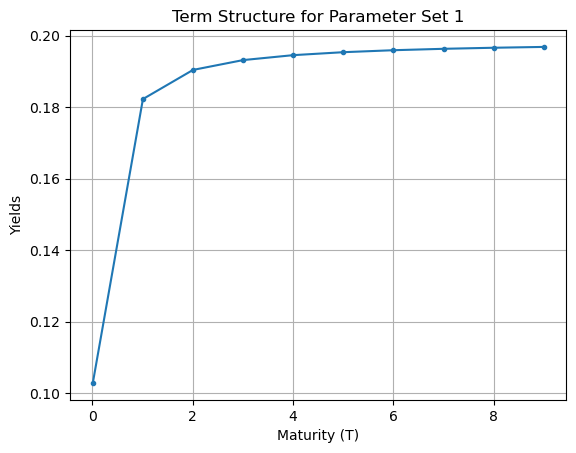

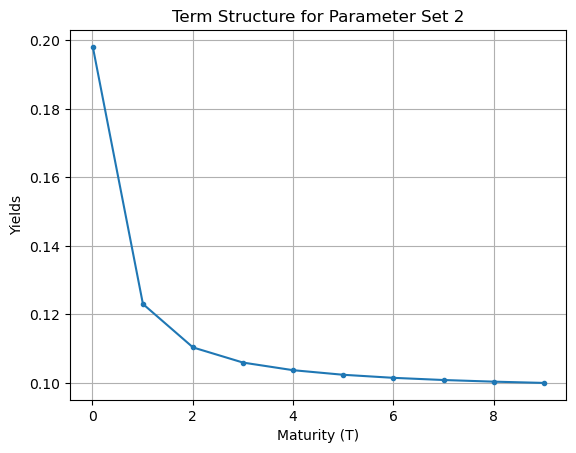

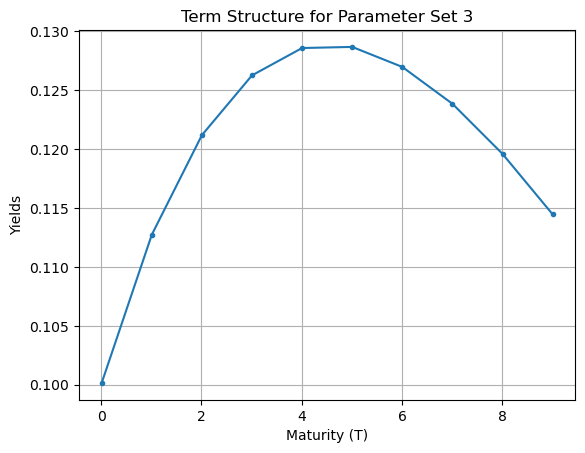

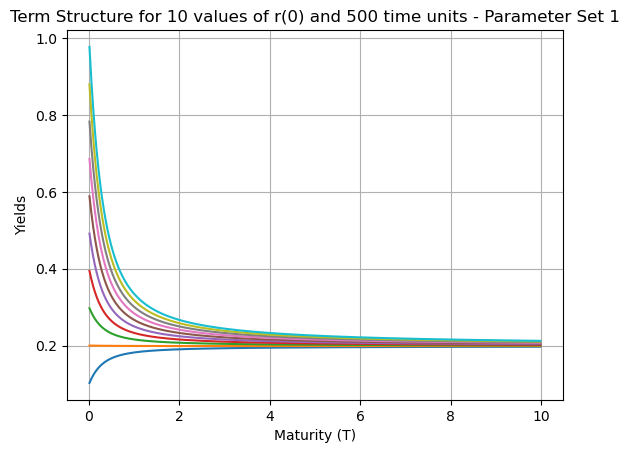

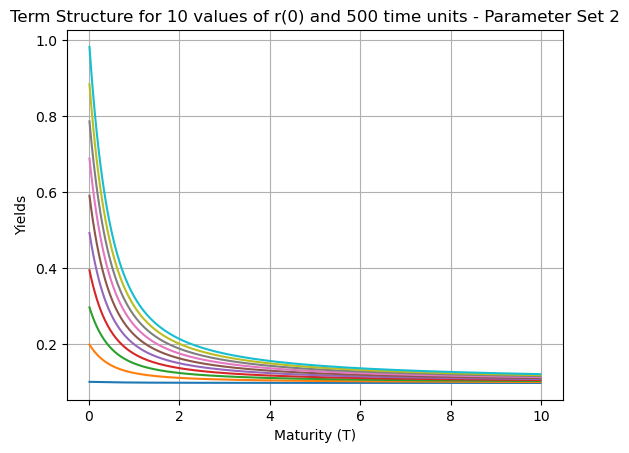

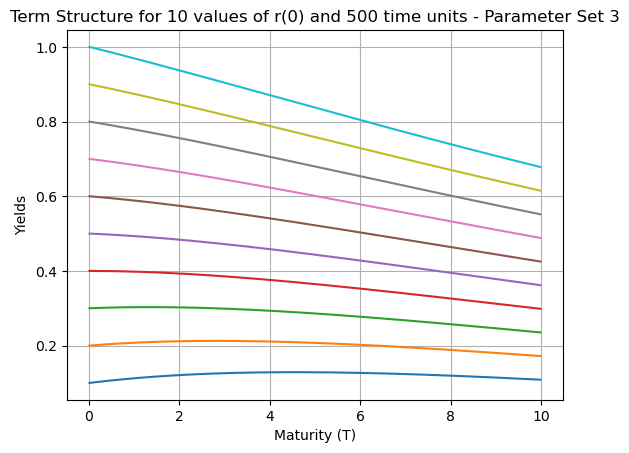

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter sets
params = [[5.9, 0.2, 0.3, 0.1], [3.9, 0.1, 0.3, 0.2], [0.1, 0.4, 0.11, 0.1]]

# Function to calculate yields using the Vasicek model
def vasicek(beta, mu, sigma, r, t, T_values):
    yields = []

    for T in T_values:  
        B = (1/beta)*(1 - np.exp(-beta * (T - t)))
        A = (B - T + t)*(beta*beta*mu - sigma*sigma*0.5)/(beta*beta) - (sigma*sigma*B*B)/(4*beta)
        price = np.exp(A - B*r)
        y = -math.log(price) / (T - t)
        yields.append(y)
    
    return yields

# Plot term structure for each parameter set
for i in range(3):
    beta, mu, sigma, r = params[i]
    T = np.linspace(0.01, 10, 10, endpoint=False)
    yields = vasicek(beta, mu, sigma, r, 0, T)

    plt.plot(T, yields, marker='.')
    plt.xlabel('Maturity (T)')
    plt.ylabel('Yields')
    plt.title(f'Term Structure for Parameter Set {i+1}')
    plt.grid(True)
    plt.show()

# Plot term structure for 10 values of r(0) and 500 time units for each parameter set
T = np.linspace(0.01, 10, 500, endpoint=False)
r_values = [0.1 * i for i in range(1, 11)]
for i in range(3):
    beta, mu, sigma, r = params[i]
    for r in r_values:
        yields = vasicek(beta, mu, sigma, r, 0, T)
        plt.plot(T, yields)

    plt.xlabel('Maturity (T)')
    plt.ylabel('Yields')
    plt.title(f'Term Structure for 10 values of r(0) and 500 time units - Parameter Set {i+1}')
    plt.grid(True)
    plt.show()